# -----------------------------------------------------------------------------------------------------
# Team Performance Prediction, Task Analysis and Substantial Features
# -----------------------------------------------------------------------------------------------------

Omid55

# Imports

In [57]:
import numpy as np
from sklearn import cross_validation
from sklearn import svm
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import lasso_path, enet_path
from sklearn.manifold import TSNE

# Loading datasets

In [20]:
# PlosOne's paper dataset
data = pd.read_csv('datasets/plos_data_cropped.csv')
tasks_no = 17
teams_no = len(data)
data.head()

,Typing Text,Typing Numbers,Brainstorm Words,Brainstorm Equations,Brainstorm Brick,Judgement Pictures,Judgement Slogans,Judgement Trial,Judgement Pages,Sudoku,...,Big5_9 - Mean,Big5_9 - Max,Big5_9 - Min,Big5_9 - Std,Big5_10 - Mean,Big5_10 - Max,Big5_10 - Min,Big5_10 - Std,Speaking Count,Std Speaking
0,176.697998,371.368011,18.2159,9,19.738600,9.07,13.40,5.380000,219,14,...,3.75,4,3,0.433013,1.75,3,1,0.829156,8294.0,0.040003
1,499.863007,424.000000,18.5909,16,35.590698,12.61,15.92,17.440001,155,11,...,4.25,5,4,0.433013,2.75,5,1,1.785360,NaN,NaN
2,160.054001,75.013000,10.1818,0,11.488600,7.57,9.56,3.300000,168,0,...,4.00,4,4,0.000000,1.50,2,1,0.500000,NaN,NaN
3,170.949005,279.223999,19.9772,9,18.829399,10.79,10.92,8.140000,239,15,...,4.00,5,3,0.707107,2.50,3,1,0.866025,NaN,NaN
4,155.804001,276.032013,13.0681,5,10.352300,5.67,4.18,-0.040000,84,12,...,4.00,4,4,0.000000,2.00,3,1,0.816497,7210.0,0.138010


In [11]:
# MBA dataset
#mba_data = pd.read_csv('datasets/teams-mba.csv')
#mba_data.head()

# Normalizing dataset

In [31]:
# normalizing by maximum value
data = data / data.max(0)

# normalizing by zscore
# << TODO >>

features = data.ix[:,tasks_no:len(data.ix[0])]
targets = data.ix[:,0:tasks_no]

In [ ]:
# Removing all chats and label related features that is computed after handling tasks
# << TODO >>


# Visualizing the dataset

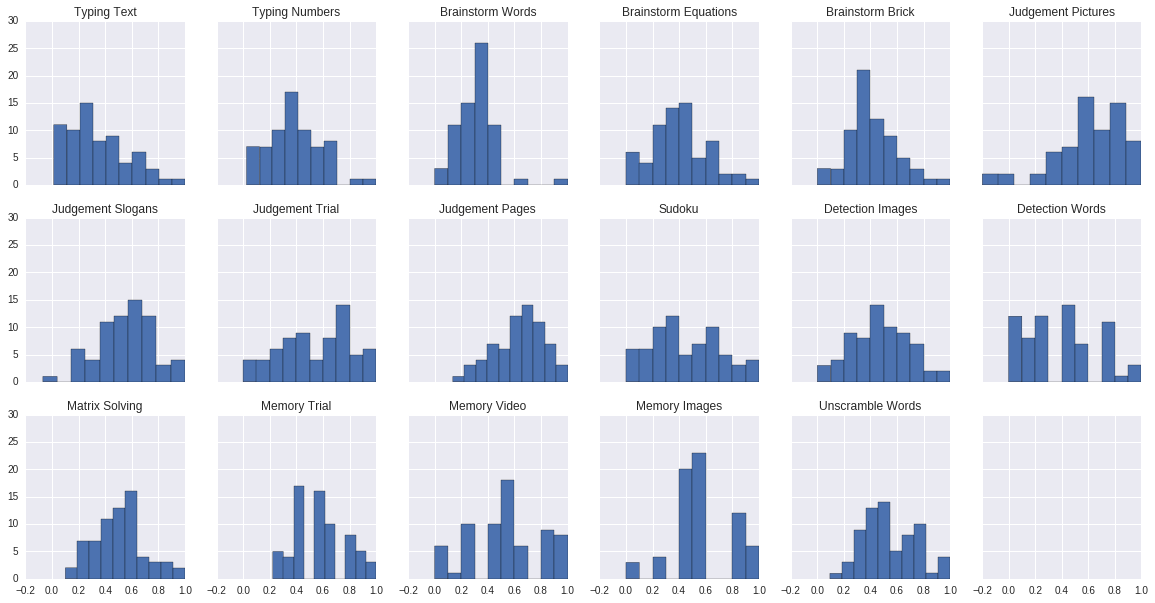

In [37]:
# Scores distribution
f, ax = plt.subplots(3, 6, sharex=True, sharey=True, figsize=(20,10))
for i in range(len(targets.ix[0])):
    p = ax.flatten()[i]
    p.hist(targets.ix[:,i])
    p.set_title(targets.columns[i])

ValueError: max must be larger than min in range parameter.

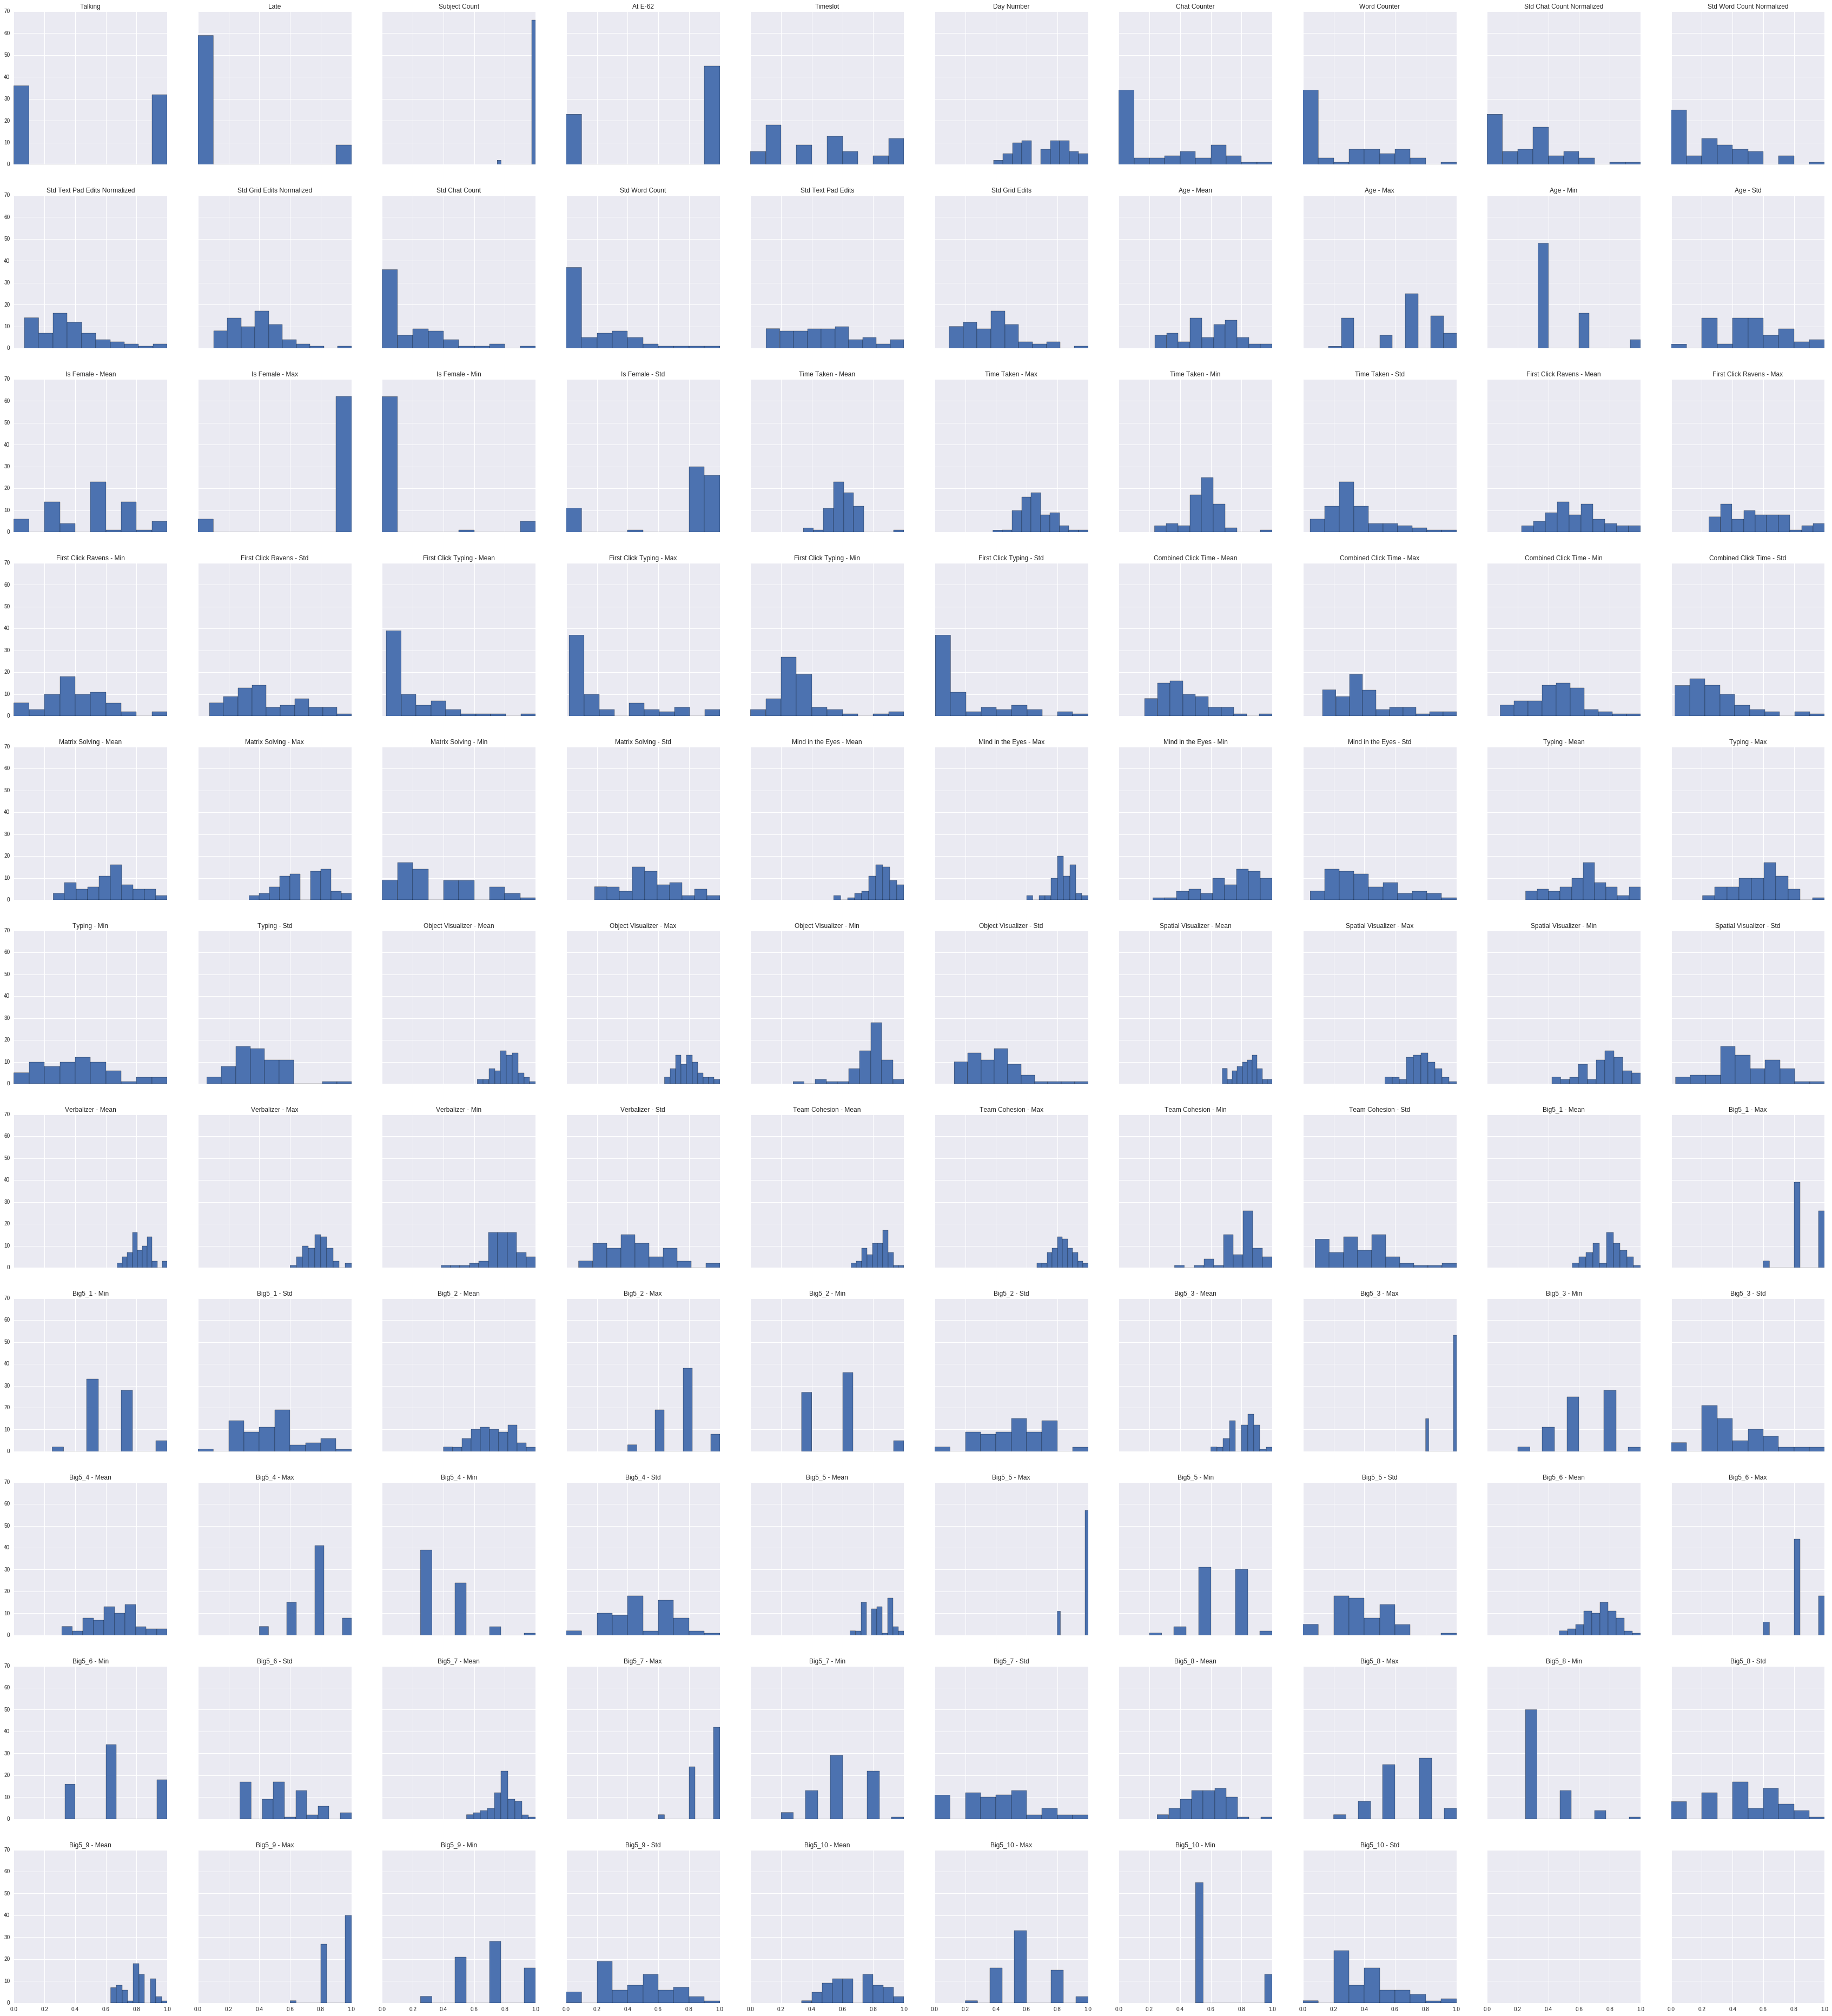

In [38]:
# Features distribution
f, ax = plt.subplots(11, 10, sharex=True, sharey=True, figsize=(60,66))
for i in range(len(features.ix[0])):
    p = ax.flatten()[i]
    p.hist(features.ix[:,i])
    p.set_title(features.columns[i])

Plotting tasks with respect to team performance scores

In [102]:
def plot_TSNE(data, names):
    tsne_model = TSNE(n_components=2)
    np.set_printoptions(suppress=True)
    points = 30 * tsne_model.fit_transform(data)
    df = pd.DataFrame(data=np.column_stack([points,names]), columns=["x","y","name"])
    pl = sns.lmplot("x", "y", data=df, hue='name', fit_reg=False, palette=sns.color_palette('colorblind'), scatter_kws={"s": 70}, size=10, aspect=1)
    for i in range(len(points)):
        pl.ax.annotate(names[i], points[i])
    sns.plt.title('T-SNE')
    sns.plt.show()

In [94]:
def plot_PCA(data, names):
    pca = decomposition.PCA(n_components=2)
    pca.fit(data)
    points2 = pca.transform(data)
    df2 = pd.DataFrame(data=np.column_stack([points2,names]), columns=["x","y","name"])
    pl = sns.lmplot("x", "y", data=df2, hue='name', fit_reg=False, palette=sns.color_palette('colorblind'), scatter_kws={"s": 70}, size=10, 
                    aspect=1)
    for i in range(len(points2)):
        pl.ax.annotate(names[i], points2[i])
    sns.plt.title('PCA')
    sns.plt.show()

In [98]:
def plot_SVD(data, names):
    pca = decomposition.TruncatedSVD(n_components=2)
    pca.fit(data)
    points2 = pca.transform(data)
    df2 = pd.DataFrame(data=np.column_stack([points2,names]), columns=["x","y","name"])
    pl = sns.lmplot("x", "y", data=df2, hue='name', fit_reg=False, palette=sns.color_palette('colorblind'), scatter_kws={"s": 70}, size=10, 
                    aspect=1)
    for i in range(len(points2)):
        pl.ax.annotate(names[i], points2[i])
    sns.plt.title('SVD')
    sns.plt.show()

In [105]:
# Based on distribution of scores, it looks like that TypingText, BrainstormWords and BrainstormBrick were hard, 
# while JudgmentPictures and JudgmentPages were relatively simple. Now, if you look at PCA or SVD, as their
# features are larger, they are easier or if they are on right hand side, they are easier ...
# << TODO: Think about it a bit more >>

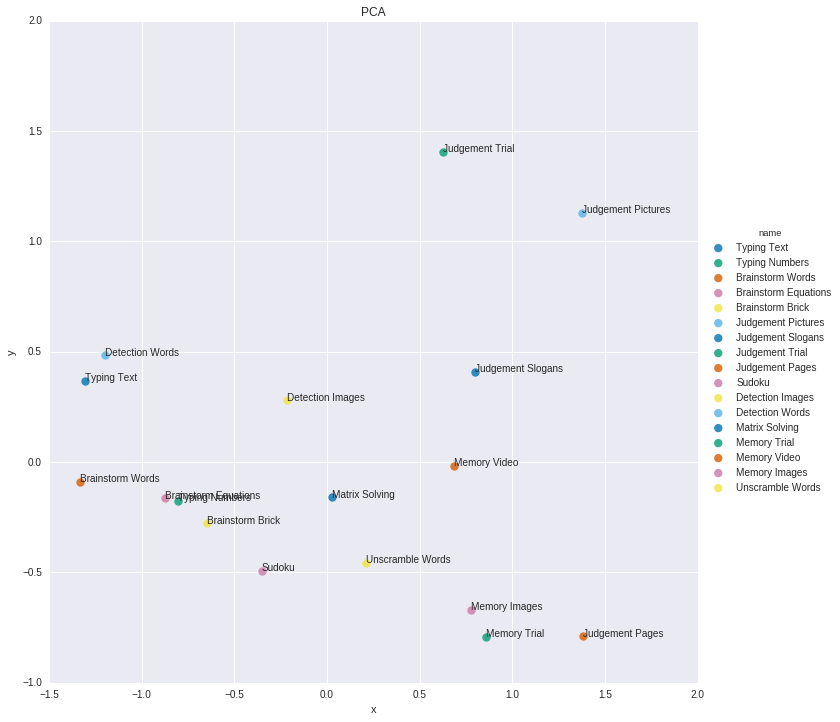

In [95]:
plot_PCA(targets.transpose(), targets.columns)

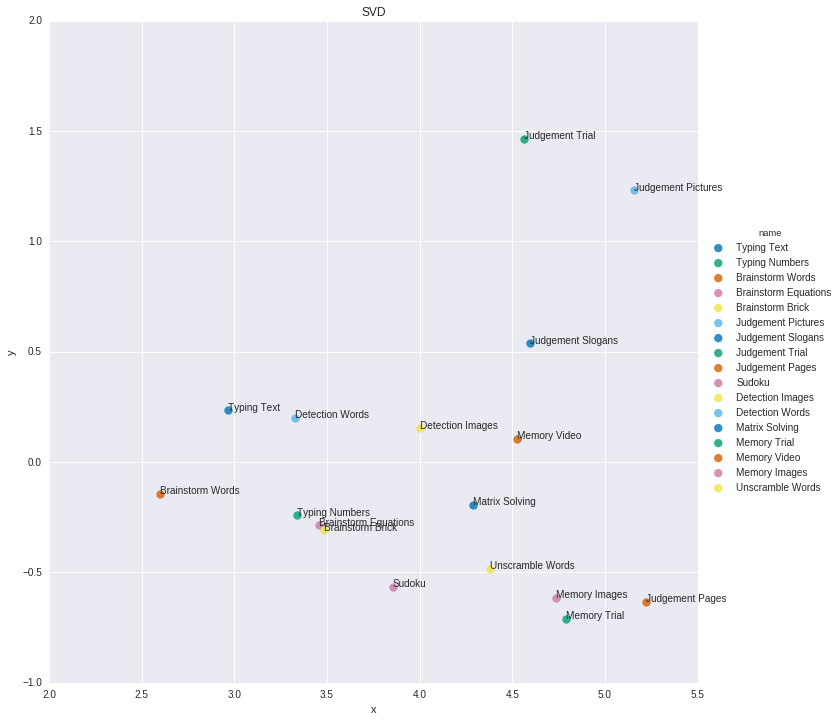

In [99]:
plot_SVD(targets.transpose(), targets.columns)

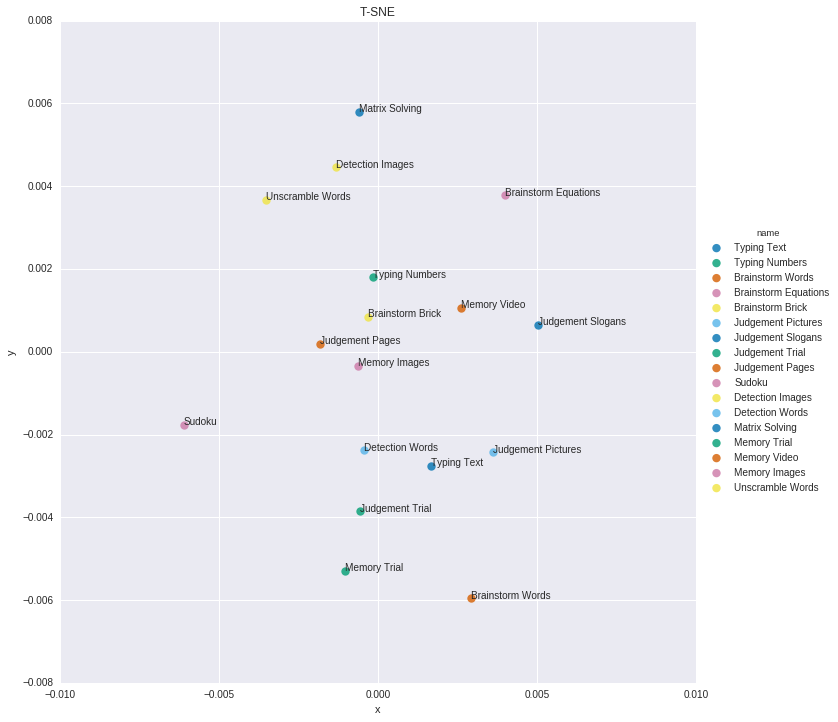

In [103]:
plot_TSNE(targets.transpose(), targets.columns)

# Clustering

# Feature Selection

# Regression

# Classification

Making scores to 'success' and 'failure' in order to change the problem to a
classification problem